In [60]:
# Libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import numpy as np
from scipy.stats import gaussian_kde

In [61]:
# Function to read the data
def read_mfcc_data(file_path):
    mfcc_blocks = []
    current_block = []
    with open(file_path, 'r') as file:
        # Iterates over each line in the file
        for line in file:
            
            # If the current block is finished, append it to the list of blocks
            if line.strip() == '':
                if current_block:
                    mfcc_blocks.append(current_block)
                    current_block = []
            else:
                # Convert each line to a list of floats (MFCC coefficients)
                frame = list(map(float, line.strip().split()))
                current_block.append(frame)
        # Append the last block if it ends without a blank line
        if current_block:
            mfcc_blocks.append(current_block)
    return mfcc_blocks

In [62]:
# Function to fit the GMM with KMeans
def fit_gmm(data, n_components=5, cov_type='full'):
    # Apply KMeans
    kmeans = KMeans(n_clusters=n_components, random_state=0)
    kmeans.fit(data)
    initial_means = kmeans.cluster_centers_
    
    # Apply GMM
    gmm_kmeans = GaussianMixture(n_components=n_components, covariance_type=cov_type, means_init=initial_means, random_state=0)
    gmm_kmeans.fit(data)

    return gmm_kmeans

In [63]:
# Function to get the blocks for a desired digit
def get_digit_blocks(mfcc_blocks, digit):
    start = digit * 660
    end = start + 660
    
    return mfcc_blocks[start:end]

In [64]:
# Reads the data
file_path = './data/Train_Arabic_Digit.txt'
mfcc_blocks = read_mfcc_data(file_path)

In [65]:
# Favorite digit
d_fav = 0

# Assumptions for the GMM
n_components = 5 # Number of components
cov_type = 'tied' # Covariance type

In [66]:
# Get the favorite digit data
fav_blocks = get_digit_blocks(mfcc_blocks, d_fav)
fav_data = np.vstack(fav_blocks)

In [67]:
# Fit data into the GMM
gmm = fit_gmm(fav_data, n_components, cov_type)

In [68]:
# Print the parameters for the favorite digit
print("GMM Parameters for Favorite Digit:", d_fav)
for m in range(gmm.n_components):
    print(f"\nComponent {m + 1}:")
    print(f" - Mixture Probability (π_m): {gmm.weights_[m]}")
    print(f" - Mean (μ_m): {gmm.means_[m]}")
    print(f" - Covariance Matrix (Σ_m):\n{gmm.covariances_[m]}")

GMM Parameters for Favorite Digit: 0

Component 1:
 - Mixture Probability (π_m): 0.19054544854753017
 - Mean (μ_m): [ 3.713232   -3.32849807 -1.97381859 -2.7057239  -1.4472059  -1.35857565
 -0.76994449 -0.32589917 -0.13550555 -1.008461   -0.45336689  0.02418484
 -0.16600653]
 - Covariance Matrix (Σ_m):
[ 2.89262422  0.02050128 -0.26220093 -0.11094708 -0.34375574 -0.2631969
 -0.32227931  0.05658084 -0.08889783 -0.0425601  -0.26966788 -0.07399138
 -0.28003657]

Component 2:
 - Mixture Probability (π_m): 0.15605770697217508
 - Mean (μ_m): [-0.01932075 -6.23376264  0.70919473 -0.23866286  0.47157326  0.03542014
  0.2539494   0.33258323  0.28956145  0.27008673  0.18305581  0.24461597
  0.0709816 ]
 - Covariance Matrix (Σ_m):
[ 0.02050128  2.12854341  0.20596565  0.19190558  0.24087409  0.13677242
  0.01363535 -0.10327204  0.0883013   0.03902446 -0.11579563 -0.08888666
 -0.06816928]

Component 3:
 - Mixture Probability (π_m): 0.08261337370734079
 - Mean (μ_m): [ 2.22114067 -8.482026    1.315

In [69]:
# Compute the likelihood for each of the utterances
digit_likelihoods = {}

for digit in range(10):
    digit_likelihoods[digit] = [] # Initialize the list of likelihoods for the digit
    digit_blocks = get_digit_blocks(mfcc_blocks, digit) # Gets the blocks for the digit
    
    # Iterate through each of the utterances (digit_blocks) for the digit
    for utterance in digit_blocks:
        utterance_data = np.array(utterance)  # Convert to numpy array
        likelihood = gmm.score_samples(utterance_data).sum()  # Gets the likelihood of the utterance (block)
        digit_likelihoods[digit].append(likelihood) # Appends the likelihood to the digit

# Print likelihoods for each digit’s utterances
for digit, likelihoods in digit_likelihoods.items():
    print(f"\nLog-likelihoods for Digit {digit} under GMM of Favorite Digit {d_fav}:")
    # Convert each np.float64 to a regular float for cleaner printing
    clean_likelihoods = [float(l) for l in likelihoods]
    print(clean_likelihoods)
    
    
    


Log-likelihoods for Digit 0 under GMM of Favorite Digit 0:
[-580.2519885133263, -502.540492513976, -549.0307691169154, -498.6185978352872, -503.5417036442027, -463.5870838385045, -537.0279708048033, -380.1594575255725, -448.7860713433725, -437.4748205274914, -359.2779093725119, -419.2153604883943, -444.18262703368055, -421.0689480827053, -382.06477331346537, -342.42985718870375, -353.3270398985845, -323.2105028375083, -378.335573442788, -398.6531962162709, -557.3102659246446, -628.59247571219, -584.5523259815635, -532.8249293779643, -541.8437818216295, -520.7493433788471, -658.5136625601051, -580.0502952322923, -558.1712809069351, -609.7678014274386, -356.1880492362489, -476.2308379759843, -344.6379475654771, -531.5507219498447, -519.2687162828887, -488.3856717218539, -485.50634480062604, -439.8915238155568, -468.1469816240543, -507.43167498357263, -486.9978849022469, -418.291286129341, -348.5476366270748, -362.4362587029783, -401.8169398920167, -310.1891465826456, -345.92173384209343

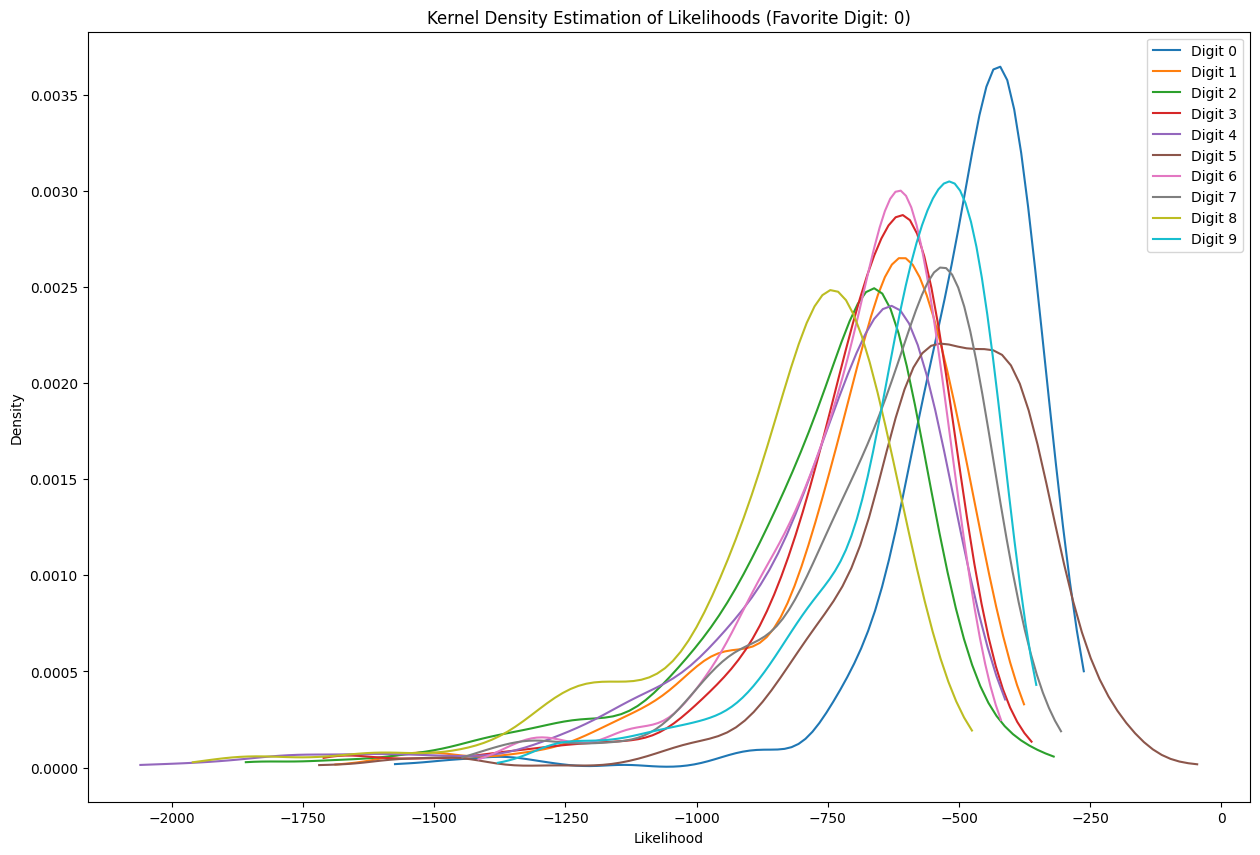

In [70]:
# Visualize the likelihoods
plt.figure(figsize=(15, 10))
# Iterates through each digit
for digit in range(10):
    likelihoods = digit_likelihoods[digit]
    kde = gaussian_kde(likelihoods)
    x_vals = np.linspace(min(likelihoods), max(likelihoods), 100)
    y_vals = kde(x_vals)
    
    plt.plot(x_vals, y_vals, label=f"Digit {digit}")

plt.title(f"Kernel Density Estimation of Likelihoods (Favorite Digit: {d_fav})")
plt.xlabel("Likelihood")
plt.ylabel("Density")
plt.legend()
plt.show()